<a href="https://colab.research.google.com/github/gjrkdgh0772/Finance/blob/main/lec01_%EA%B8%88%EC%9C%B5%EA%B4%80%EB%A0%A8API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font size=6><b>Lec01 : 금융관련 API 활용 </b></font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# 증시 정보 관련 

<img src="https://avatars.githubusercontent.com/u/34187310?v=4">

## PyKRX
* 웹 싸이트 (Naver/KRX)에서 주가 정보 스크래핑
* ref : https://github.com/sharebook-kr/pykrx

----
* STOCK : MarketData, 인덱스, 공매도
* ETX : ETF, ETN, ELW
* 채권
* 채권 수익률
* 기타

In [ ]:
! pip install pykrx

     |████████████████████████████████| 92 kB 309 kB/s 
     |████████████████████████████████| 51 kB 349 kB/s 
     |████████████████████████████████| 251 kB 8.1 MB/s 


In [ ]:
from pykrx import stock
from pykrx import bond

* Stock 모듈 - MarketData API

In [ ]:
tickers = stock.get_market_ticker_list("202201")   # 2021-01 해당 일자 코스피 상장된 ticker
print(tickers[:5])

['095570', '006840', '027410', '282330', '138930']


In [ ]:
tickers = stock.get_market_ticker_list("20190225", market="KOSDAQ") #KOSPI, KOSDAQ, KONEX
print(tickers[:5])

['060310', '054620', '265520', '211270', '035760']


In [ ]:
종목명 = stock.get_market_ticker_name('035760')
print(종목명)

CJ ENM


In [ ]:
df = stock.get_market_ohlcv("2018-04-28", "2018-05-10", "005930")
print(df.head(3))

            시가  고가  저가     종가  거래량
날짜                                
2018-04-30   0   0   0  53000    0
2018-05-02   0   0   0  53000    0
2018-05-03   0   0   0  53000    0


In [ ]:
stock.get_business_days(2022, 2)[:3]

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00')]

* 해당 날짜 기준 종목 정보
* 대상 : etf, elw, market, index

In [ ]:
stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]

['095570', '006840', '027410']

In [ ]:
stock.get_index_ticker_list(date='202201', market='KOSPI')[:3]

['1001', '1002', '1003']

* 네이버 주가정보 크롤링 정보 제공

In [ ]:
import time
ticker_list = stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]
for ticker in ticker_list:
    print(stock.get_market_ticker_name(ticker))
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    print(df.head())
    print("----" * 20)
    time.sleep(1)      #------ 무작위 크롤링시 차단 주의 

AJ네트웍스
              시가    고가    저가    종가     거래량
날짜                                        
2018-12-10  4840  4840  4670  4750   32310
2018-12-11  4685  4750  4585  4585   37975
2018-12-12  4605  4605  4520  4540  102752
--------------------------------------------------------------------------------
AK홀딩스
               시가     고가     저가     종가    거래량
날짜                                           
2018-12-10  55400  56200  54900  55800  28618
2018-12-11  55800  56200  54900  55100  24302
2018-12-12  55400  55900  54900  55900  13179
--------------------------------------------------------------------------------
BGF
              시가    고가    저가    종가     거래량
날짜                                        
2018-12-10  7900  8000  7830  7900  103028
2018-12-11  7900  8010  7860  7900  122166
2018-12-12  7900  8230  7900  8200  160608
--------------------------------------------------------------------------------


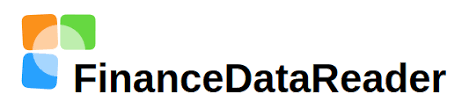

## FinanceDataReader
* 수정주가(Adjusted Price) : 총 발행 주식수의 변화를 반영한 가격
* 백테스트, 수익률 분석 시 반드시!!! 수정주가 사용  -->  주가 연속성 보장
* <font color=red><b>FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공</b></font><br><br>
* ref : https://github.com/FinanceData/FinanceDataReader

In [ ]:
! pip install finance-datareader

     |████████████████████████████████| 48 kB 4.2 MB/s 


* 2018년 5월 4일, 삼성전자는 50:1로 액면분할

In [ ]:
import FinanceDataReader as fdr

In [ ]:
df = fdr.DataReader('005930', '2018-04-28', '2018-05-10', exchange='KRX') 
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


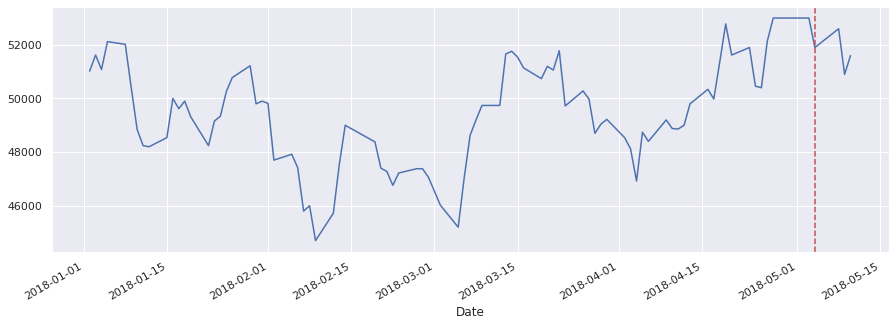

In [ ]:
df = fdr.DataReader('005930', '2018-01-01', '2018-05-10')
ax = df['Close'].plot(figsize=(15,5))
ax.axvline('2018-05-04', ls='--', color='r')


In [ ]:
#------------------------------------------------------------
# FX 환율, 1995 ~ 현재
#------------------------------------------------------------
# usdkrw = fdr.DataReader('USD/KRW', '2022-01-01') # 달러 원화
# usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
# usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화


#------------------------------------------------------------
# 상품 선물 가격 데이터
#------------------------------------------------------------
# df = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
# df = fdr.DataReader('ZG') # 금 선물 (ICE)
# df = fdr.DataReader('ZI') # 은 선물 (ICE)
# df = fdr.DataReader('HG') # 구리 선물 (COMEX)


#------------------------------------------------------------
# Bitcoin KRW price (Bithumbs), 2016 ~ Now
#------------------------------------------------------------
# btc = fdr.DataReader('BTC/KRW', '2016-01-01')

#------------------------------------------------------------
# 채권 수익률
#------------------------------------------------------------
# df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
# df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률
# df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
# df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

#------------------------------------------------------------
# stock symbol list
#------------------------------------------------------------
# stock_df = fdr.StockListing('KRX')   # 코스피, 코스닥, 코넥스 전체
# stock_df = fdr.StockListing('KOSPI') # 코스피
# stock_df = fdr.StockListing('KOSDAQ') # 코스닥
# stock_df = fdr.StockListing('KONEX') # 코넥스
# stock_df = fdr.StockListing('NYSE')   # 뉴욕거래소
# stock_df = fdr.StockListing('NASDAQ') # 나스닥
# stock_df = fdr.StockListing('AMEX')   # 아멕스
# stock_df = fdr.StockListing('S&P500')
# stock_df = fdr.StockListing('SSE') # 상해 거래소
# stock_df = fdr.StockListing('SZSE') # 신천 거래소
# stock_df = fdr.StockListing('HKEX') # 홍콩거래소
# stock_df = fdr.StockListing('TSE') # 도쿄 증권거래소
# stock_df = fdr.StockListing('HOSE') # 호치민 증권거래소
# stock_df = fdr.StockListing('KRX-ADMINISTRATIVE') # 관리종목 리스트
# stock_df = fdr.StockListing('KRX-DELISTING')  # -----------상장폐지 종목 전체 리스트

#------------------------------------------------------------
# FRED 연준 데이터
#------------------------------------------------------------ 
# m2 = fdr.DataReader('M2', data_source='fred')                        #M2통화량
# nq = fdr.DataReader('NASDAQCOM', data_source='fred')                 # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수 


* 캔들차트 

In [ ]:
! pip install bokeh

In [ ]:
df = fdr.DataReader('005930', '2022-01-01', '2022-02-15')

my_config = {'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
          'width': 600, 
          'height': 300,
          'volume': True,
}
fdr.chart.config(config=my_config)
fdr.chart.plot(df, title='삼성전자(005930)')

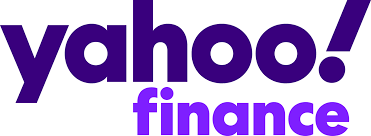

## yahoo finance
* ref : https://github.com/ranaroussi/yfinance/
* ref : https://pypi.org/project/yfinance/

In [ ]:
! pip install yfinance
# XXXXX #! pip install yahoo-finance  <구버전>

     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 63 kB 782 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="min")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21,163.509995,166.350006,163.009995,165.380005,95722200,0,0


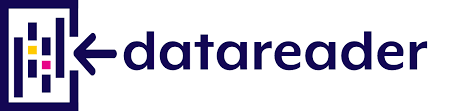

## pandas_datareader

In [ ]:
! pip install pandas_datareader

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
df_ss = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')
df_ms = pdr.get_data_yahoo('MSFT', '2018-01-01', '2019-12-31')

RemoteDataError: ignored

In [ ]:
df_ss.info()
df_ss.head()

# 기술적 지표 관련 

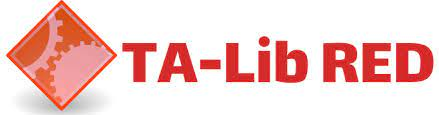

## TA-LIB

TA-LIB download ( TA_Lib‑0.4.24‑cp38‑cp38‑win_amd64.whl )
* ref : https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
* ref : https://github.com/mrjbq7/ta-lib

In [ ]:
# ! pip install TA_Lib-0.4.24-cp38-cp38-win_amd64.whl

In [ ]:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 4.5 MB/s 


In [ ]:
import talib
import numpy
c = numpy.random.randn(100)

print(talib.STOCHRSI(c))

rsi = talib.RSI(c)
print(talib.STOCHF(rsi, rsi, rsi))
print(talib.RSI(c))


(array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
        38.05248438, 100.        ,  33.20816049,  64.49593929,
         0.        ,  44.48882617,  48.14633854,  97.3463841 ,
       100.        ,  34.83017813,   0.        ,   0.        ,
        75.89348139,  72.366809  ,  79.41770176,  88.72548515,
       100.        ,   6.49178207,  85.62582935,  93.62837902,
         0.        ,  53.87395771,  62.96274765,  21.84315665,
        86.06217804,   0.        ,   0.        ,  59.19932525,
        51.74247148,   0.        , 100.        , 100.        ,
        44.89313073, 100.        ,  90.10095646,  14.02759484,
         6.53525563,   0.        ,  69.63324126,  53.57829067,
       100.        ,  82.19661389, 100.        ,  33.7

# 증시 달력 관련
* https://open.krx.co.kr/contents/MKD/01/0110/01100305/MKD01100305.jsp
* https://github.com/rsheftel/pandas_market_calendars
* https://github.com/quantopian/trading_calendars
* https://github.com/gerrymanoim/exchange_calendars

## pykrx

In [ ]:
from pykrx import stock
stock.get_business_days(2022, 2)

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00'),
 Timestamp('2022-02-08 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-02-10 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-14 00:00:00'),
 Timestamp('2022-02-15 00:00:00'),
 Timestamp('2022-02-16 00:00:00'),
 Timestamp('2022-02-17 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-02-22 00:00:00'),
 Timestamp('2022-02-23 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-02-25 00:00:00'),
 Timestamp('2022-02-28 00:00:00')]

## pandas_market_calendars
* https://github.com/rsheftel/pandas_market_calendars/blob/master/docs/usage.rst

In [ ]:
# ! pip install pandas_market_calendars-3.3-py3-none-any.whl

In [ ]:
! pip install pandas-market-calendars

     |████████████████████████████████| 89 kB 3.2 MB/s 
     |████████████████████████████████| 150 kB 37.9 MB/s 
  Created wheel for exchange-calendars: filename=exchange_calendars-3.6.1-py3-none-any.whl size=180505 sha256=b59215ffc3066eb098bb1b95cbcafbebb97b7a4b6f3e050fed223ddcbbb55d92
  Stored in directory: /root/.cache/pip/wheels/db/70/a2/5e1d8d0873feb8cb9808f3b55e8f270698b742db54a4b8ad2e
Successfully built exchange-calendars


In [ ]:
from datetime import time
import pandas as pd
import pandas_market_calendars as mcal

In [ ]:
xkrx = mcal.get_calendar('XKRX')
xkrx.discontinued_market_times
print(xkrx.has_discontinued)
xkrx.remove_time("break_start")
xkrx.remove_time("break_end")
print(xkrx.has_discontinued)
cal_df = xkrx.schedule("2022-02-22", "2022-02-24")
cal_df.head()

True
False


,market_open,market_close
2022-02-22,2022-02-22 00:00:00+00:00,2022-02-22 06:30:00+00:00
2022-02-23,2022-02-23 00:00:00+00:00,2022-02-23 06:30:00+00:00
2022-02-24,2022-02-24 00:00:00+00:00,2022-02-24 06:30:00+00:00


## exchange_calendars
* ref : https://github.com/gerrymanoim/exchange_calendars

In [ ]:
! pip install exchange_calendars

In [ ]:
import exchange_calendars as xcals 
import datetime
import pandas as pd
print( xcals.get_calendar_names(include_aliases=False))

krx = xcals.get_calendar("XKRX") 
print(krx.is_session("2022-02-20"))   #일료일
print(krx.is_session(datetime.date.today().strftime("%Y-%m-%d"))) #오늘   개장여부

cal_df = krx.schedule.loc["2022-02-23":"2022-02-25"]
cal_df.head()


['24/5', '24/7', 'AIXK', 'ASEX', 'BVMF', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBSE', 'XBUD', 'XBUE', 'XCBF', 'XCSE', 'XDUB', 'XETR', 'XFRA', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLON', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'us_futures']
False
True


,market_open,break_start,break_end,market_close
2022-02-23 00:00:00+00:00,2022-02-23,NaT,NaT,2022-02-23 06:30:00
2022-02-24 00:00:00+00:00,2022-02-24,NaT,NaT,2022-02-24 06:30:00
2022-02-25 00:00:00+00:00,2022-02-25,NaT,NaT,2022-02-25 06:30:00


In [ ]:
cal_df = krx.sessions_in_range("2022-01-01", "2022-01-10")
cal_df

DatetimeIndex(['2022-01-03 00:00:00+00:00', '2022-01-04 00:00:00+00:00',
               '2022-01-05 00:00:00+00:00', '2022-01-06 00:00:00+00:00',
               '2022-01-07 00:00:00+00:00', '2022-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='C')

In [ ]:
print("이전개장일", krx.previous_session("2022-02-21")) #월요일
print("다음개장일", krx.next_session("2022-02-21"))     #

이전개장일 2022-02-18 00:00:00+00:00
다음개장일 2022-02-22 00:00:00+00:00


In [ ]:
! ecal XKRX 1 2022

        January 2022
 Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]
[ 2]  3   4   5   6   7 [ 8]
[ 9] 10  11  12  13  14 [15]
[16] 17  18  19  20  21 [22]
[23] 24  25  26  27  28 [29]
[30][31]



In [ ]:
! ecal XKRX 2022

                                          2022
          January                        February                        March
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]           [ 1][ 2]  3   4 [ 5]           [ 1]  2   3   4 [ 5]
[ 2]  3   4   5   6   7 [ 8]   [ 6]  7   8   9  10  11 [12]   [ 6]  7   8 [ 9] 10  11 [12]
[ 9] 10  11  12  13  14 [15]   [13] 14  15  16  17  18 [19]   [13] 14  15  16  17  18 [19]
[16] 17  18  19  20  21 [22]   [20] 21  22  23  24  25 [26]   [20] 21  22  23  24  25 [26]
[23] 24  25  26  27  28 [29]   [27] 28                        [27] 28  29  30  31
[30][31]

           April                           May                            June
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                      1 [ 2]                                              [ 1]  2   3 [ 4]
[ 3]  4   5   6   7   8 [ 9]   [ 1]  2   3   4 [ 5]  6 [ 7]   [ 5][ 